In [15]:
import pandas as pd

pathSynonym =  input("Enter path to synonym.cvs file: ")
synonym = pd.read_csv(pathSynonym)
synonymSet = synonym.to_numpy()

#please run the command "pip install fasttext-wheel" in your termianl to install the library
import fasttext
import fasttext.util


In [17]:
# Task 1

import logging
import gensim.downloader as api
import random

# load word2vec-google-news-300 model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
word2vec_googleNews300 = api.load('word2vec-google-news-300')

pairs = []

for word in synonymSet:
    synonymWord = []
    for i in range(4):
        synonymWord.append((word[0], word[i + 2], word[1]))
    pairs.append(synonymWord)

similarityGoogleNews300 = []

# use cosine similarity to find closest synonym to question from 4 given options
# store question, answer, synonym found by cosine similarity in similarityGoogleNews300
for setOfWords in pairs:
    word2vec_Similarity = {}
    choices = []
    for w1, w2, w3 in setOfWords:
        choices.append(w2)
        try:
            w1_in_w2v = word2vec_googleNews300[w1]
        except KeyError:
            break
        try:
            w2_in_w2v = word2vec_googleNews300[w2]
        except KeyError:
            break
        word2vec_Similarity[word2vec_googleNews300.similarity(w1, w2)] = w1, w2
    # if guesses could be done by cosine similarity
    # store closest synonym found in similarityGoogleNews300
    if (len(word2vec_Similarity) != 0):
        similarityGoogleNews300.append((word2vec_Similarity[max(word2vec_Similarity)][0], setOfWords[0][2], word2vec_Similarity[max(word2vec_Similarity)][1]))
     # if no guesses could be done with cosine similarity
    else:
        similarityGoogleNews300.append((setOfWords[0][0], setOfWords[0][2], random.choice(choices), "guess"))

# similarity results for each question
fileGoogleNews300 = open("word2vec-google-news-300-details.csv", "a")
fileGoogleNews300.write("question,answer,guess,label\n")

correct_labels = 0
guess_label = 0

for guesses in similarityGoogleNews300:
    if len(guesses) == 3:
        if guesses[1] == guesses[2]:
            fileGoogleNews300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},correct\n")
            correct_labels += 1
        if guesses[1] != guesses[2]:
            fileGoogleNews300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},wrong\n")
    else:
        fileGoogleNews300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},guess\n")
        guess_label += 1
fileGoogleNews300.close()        

# single line: model name, number of unique words in vocabulary, number of correct labels (C), number of questions answered (V = 80 - guess labels), C / v
fileAnalysis = open("analysis.csv", "a")
fileAnalysis.write("ModelName, VocabSize, CorrectLabel, WordNotGuessed, Accuracy \n")
fileAnalysis.write(f"word2vec-google-news-300,{len(word2vec_googleNews300)},{correct_labels},{80 - guess_label},{correct_labels / (80 - guess_label)}\n")
fileAnalysis.close()


2023-12-03 20:01:46,522 : INFO : loading projection weights from C:\Users\l_aminat/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
2023-12-03 20:02:29,436 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:\\Users\\l_aminat/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-12-03T20:02:29.419992', 'gensim': '4.3.2', 'python': '3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}


In [ ]:
#task 2 
#2 new models from different corpora but same embedding size

#first model is Wikipedia pre-trained Word2Vec
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
glove_wikigigaword300 = api.load("glove-wiki-gigaword-300")
similarityGlovewikipedia300 = []

# use cosine similarity to find closest synonym to question from 4 given options
# store question, answer, synonym found by cosine similarity in similarityGoogleNews300
for setOfWords in pairs:
    word2vec_Similarity = {}
    choices = []
    for w1, w2, w3 in setOfWords:
        choices.append(w2)
        try:
            w1_in_w2v = glove_wikigigaword300[w1]
        except KeyError:
            break
        try:
            w2_in_w2v = glove_wikigigaword300[w2]
        except KeyError:
            break
        word2vec_Similarity[glove_wikigigaword300.similarity(w1, w2)] = w1, w2
    # if guesses could be done by cosine similarity
    # store closest synonym found in similarityGoogleNews300
    if (len(word2vec_Similarity) != 0):
        similarityGlovewikipedia300.append((word2vec_Similarity[max(word2vec_Similarity)][0], setOfWords[0][2], word2vec_Similarity[max(word2vec_Similarity)][1]))
     # if no guesses could be done with cosine similarity
    else:
        similarityGlovewikipedia300.append((setOfWords[0][0], setOfWords[0][2], random.choice(choices), "guess"))

# similarity results for each question
fileGlovewWikiGigaword300= open("glove-wiki-gigaword-300-details.csv", "a")
fileGlovewWikiGigaword300.write("question,answer,guess,label\n")

correct_labels = 0
guess_label = 0

for guesses in similarityGlovewikipedia300:
    if len(guesses) == 3:
        if guesses[1] == guesses[2]:
            fileGlovewWikiGigaword300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},correct\n")
            correct_labels += 1
        if guesses[1] != guesses[2]:
            fileGlovewWikiGigaword300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},wrong\n")
    else:
        fileGlovewWikiGigaword300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},guess\n")
        guess_label += 1
fileGlovewWikiGigaword300.close()        

# single line: model name, number of unique words in vocabulary, number of correct labels (C), number of questions answered (V = 80 - guess labels), C / v
fileAnalysis = open("analysis.csv", "a")
fileAnalysis.write(f"word2vec-wiki-gigaword-300,{len(glove_wikigigaword300)},{correct_labels},{80 - guess_label},{correct_labels / (80 - guess_label)}\n")
fileAnalysis.close()




In [ ]:


#second model

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#fasttext.util.download_model('en', if_exists='ignore')  # English
#fastText300 = fasttext.load_model('cc.en.300.bin')
fastText300 = api.load("fasttext-wiki-news-subwords-300")
similarity_fastText300 = []

# use cosine similarity to find closest synonym to question from 4 given options
# store question, answer, synonym found by cosine similarity in similarityGoogleNews300
for setOfWords in pairs:
    word2vec_Similarity = {}
    choices = []
    for w1, w2, w3 in setOfWords:
        choices.append(w2)
        try:
            w1_in_w2v = fastText300[w1]
        except KeyError:
            break
        try:
            w2_in_w2v = fastText300[w2]
        except KeyError:
            break
        word2vec_Similarity[fastText300.similarity(w1, w2)] = w1, w2
    # if guesses could be done by cosine similarity
    # store closest synonym found in similarityGoogleNews300
    if (len(word2vec_Similarity) != 0):
        similarity_fastText300.append((word2vec_Similarity[max(word2vec_Similarity)][0], setOfWords[0][2], word2vec_Similarity[max(word2vec_Similarity)][1]))
     # if no guesses could be done with cosine similarity
    else:
        similarity_fastText300.append((setOfWords[0][0], setOfWords[0][2], random.choice(choices), "guess"))

# similarity results for each question
fileFastText300 = open("FastText-wiki-300-details.csv", "a")
fileFastText300.write("question,answer,guess,label\n")

correct_labels = 0
guess_label = 0

for guesses in similarity_fastText300:
    if len(guesses) == 3:
        if guesses[1] == guesses[2]:
            fileFastText300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},correct\n")
            correct_labels += 1
        if guesses[1] != guesses[2]:
            fileFastText300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},wrong\n")
    else:
        fileFastText300.write(f"{guesses[0]},{guesses[1]},{guesses[2]},guess\n")
        guess_label += 1
fileFastText300.close()        

# single line: model name, number of unique words in vocabulary, number of correct labels (C), number of questions answered (V = 80 - guess labels), C / v
fileAnalysis = open("analysis.csv", "a")
print(guess_label)
fileAnalysis.write(f"FastText-wiki-300,{len(fastText300)},{correct_labels},{80 - guess_label},{correct_labels / (80 - guess_label)}\n")
fileAnalysis.close()


In [ ]:
#task 2 
#2 new models from the same corpus but different embedding sizes

# first model is Glove Twitter model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
glove_twitter100 = api.load("glove-twitter-100")

similarityGloveTwitter100 = []

# use cosine similarity to find closest synonym to question from 4 given options
# store question, answer, synonym found by cosine similarity in similarityGoogleNews300
for setOfWords in pairs:
    word2vec_Similarity = {}
    choices = []
    for w1, w2, w3 in setOfWords:
        choices.append(w2)
        try:
            w1_in_w2v = glove_twitter100[w1]
        except KeyError:
            break
        try:
            w2_in_w2v = glove_twitter100[w2]
        except KeyError:
            break
        word2vec_Similarity[glove_twitter100.similarity(w1, w2)] = w1, w2
    # if guesses could be done by cosine similarity
    # store closest synonym found in similarityGoogleNews300
    if (len(word2vec_Similarity) != 0):
        similarityGloveTwitter100.append((word2vec_Similarity[max(word2vec_Similarity)][0], setOfWords[0][2], word2vec_Similarity[max(word2vec_Similarity)][1]))
     # if no guesses could be done with cosine similarity
    else:
        similarityGloveTwitter100.append((setOfWords[0][0], setOfWords[0][2], random.choice(choices), "guess"))

# similarity results for each question
fileGloveTwitter100 = open("glove-twitter-100-details.csv", "a")
fileGloveTwitter100.write("question,answer,guess,label\n")

correct_labels = 0
guess_label = 0

for guesses in similarityGloveTwitter100:
    if len(guesses) == 3:
        if guesses[1] == guesses[2]:
            fileGloveTwitter100.write(f"{guesses[0]},{guesses[1]},{guesses[2]},correct\n")
            correct_labels += 1
        if guesses[1] != guesses[2]:
            fileGloveTwitter100.write(f"{guesses[0]},{guesses[1]},{guesses[2]},wrong\n")
    else:
        fileGloveTwitter100.write(f"{guesses[0]},{guesses[1]},{guesses[2]},guess\n")
        guess_label += 1
fileGloveTwitter100.close()        

# single line: model name, number of unique words in vocabulary, number of correct labels (C), number of questions answered (V = 80 - guess labels), C / v
fileAnalysis = open("analysis.csv", "a")
fileAnalysis.write(f"word2vec-glove-twitter-100,{len(glove_twitter100)},{correct_labels},{80 - guess_label},{correct_labels / (80 - guess_label)}\n")
fileAnalysis.close()



# fourth model same copora but different embedding size
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
glove_twitter25 = api.load("glove-twitter-25")

similarityGloveTwitter25 = []

# use cosine similarity to find closest synonym to question from 4 given options
# store question, answer, synonym found by cosine similarity in similarityGoogleNews300
for setOfWords in pairs:
    word2vec_Similarity = {}
    choices = []
    for w1, w2, w3 in setOfWords:
        choices.append(w2)
        try:
            w1_in_w2v = glove_twitter25[w1]
        except KeyError:
            break
        try:
            w2_in_w2v = glove_twitter25[w2]
        except KeyError:
            break
        word2vec_Similarity[glove_twitter25.similarity(w1, w2)] = w1, w2
    # if guesses could be done by cosine similarity
    # store closest synonym found in similarityGoogleNews300
    if (len(word2vec_Similarity) != 0):
        similarityGloveTwitter25.append((word2vec_Similarity[max(word2vec_Similarity)][0], setOfWords[0][2], word2vec_Similarity[max(word2vec_Similarity)][1]))
     # if no guesses could be done with cosine similarity
    else:
        similarityGloveTwitter25.append((setOfWords[0][0], setOfWords[0][2], random.choice(choices), "guess"))

# similarity results for each question
fileGloveTwitter25 = open("glove-twitter-25-details.csv", "a")
fileGloveTwitter25.write("question,answer,guess,label\n")

correct_labels = 0
guess_label = 0

for guesses in similarityGloveTwitter25:
    if len(guesses) == 3:
        if guesses[1] == guesses[2]:
            fileGloveTwitter25.write(f"{guesses[0]},{guesses[1]},{guesses[2]},correct\n")
            correct_labels += 1
        if guesses[1] != guesses[2]:
            fileGloveTwitter25.write(f"{guesses[0]},{guesses[1]},{guesses[2]},wrong\n")
    else:
        fileGloveTwitter25.write(f"{guesses[0]},{guesses[1]},{guesses[2]},guess\n")
        guess_label += 1
fileGloveTwitter25.close()        

# single line: model name, number of unique words in vocabulary, number of correct labels (C), number of questions answered (V = 80 - guess labels), C / v
fileAnalysis = open("analysis.csv", "a")
fileAnalysis.write(f"glove-twitter-25,{len(glove_twitter25)},{correct_labels},{80 - guess_label},{correct_labels / (80 - guess_label)}\n")
fileAnalysis.close()





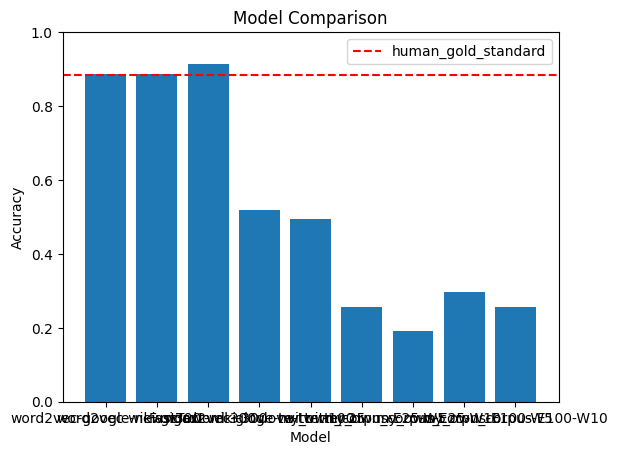

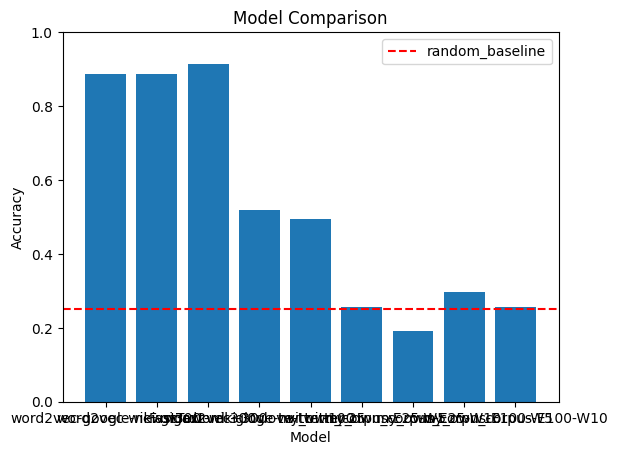

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

analysis_data = pd.read_csv("analysis.csv")

analysis_data.columns = analysis_data.columns.str.strip()

plt.bar(analysis_data["ModelName"], analysis_data["Accuracy"])

average_accuracy = 88.28  # Replace this with the actual average accuracy value
plt.axhline(y=average_accuracy / 100, color='red', linestyle='--', label='human_gold_standard')

plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set the y-axis limits to better visualize differences

plt.legend()

plt.savefig('accuracy_comparison_plot_with_human_gold_standard.png')
plt.show()


plt.bar(analysis_data["ModelName"], analysis_data["Accuracy"])

random_baseline = 0.25
plt.axhline(y=random_baseline, color='red', linestyle='--', label='random_baseline')

plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set the y-axis limits to better visualize differences

plt.legend()

plt.savefig('accuracy_comparison_plot_with_random_baseline.png')
plt.show()






In [ ]:
#Task 3
#Training my own model
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec

nltk.download('punkt')

book_files = ["book1.txt", "book2.txt", "book3.txt", "book4.txt", "book5.txt"]

sentences = []
for book in book_files:
    with open(book, "r", errors='ignore') as f:
        text = f.read()
        sent_tokens = sent_tokenize(text)
        for sentence in sent_tokens:
            word_tokens = word_tokenize(sentence)
            sentences.append(word_tokens)

models = {
    f'my_own_corpus-E{25}-W{5}': Word2Vec(sentences, window=5, vector_size=25, min_count=1),
    f'my_own_corpus-E{25}-W{10}': Word2Vec(sentences, window=10, vector_size=25, min_count=1),
    f'my_own_corpus-E{100}-W{5}': Word2Vec(sentences, window=5, vector_size=100, min_count=1),
    f'my_own_corpus-E{100}-W{10}': Word2Vec(sentences, window=10, vector_size=100, min_count=1),
}
for model_name, model in models.items():
    correct_labels = 0
    guess_label = 0
    similarity = []

    # use cosine similarity to find closest synonym to question from 4 given options
    # store question, answer, synonym found by cosine similarity in my_own_corpus
    for setOfWords in pairs:
        word2vec_Similarity = {}
        choices = []
        for w1, w2, w3 in setOfWords:
            choices.append(w2)
            try:
                w1_in_w2v = model.wv[w1]
            except KeyError:
                break
            try:
                w2_in_w2v = model.wv[w2]
            except KeyError:
                break
            word2vec_Similarity[model.wv.similarity(w1, w2)] = w1, w2
        # if guesses could be done by cosine similarity
        # store closest synonym found in my_own_corpus
        if (len(word2vec_Similarity) != 0):
            similarity.append((word2vec_Similarity[max(word2vec_Similarity)][0], setOfWords[0][2], word2vec_Similarity[max(word2vec_Similarity)][1]))
        # if no guesses could be done with cosine similarity
        # leave closest synonym as '-'
        else:
            similarity.append((setOfWords[0][0], setOfWords[0][2], random.choice(choices), "guess"))

            
    with open(f"{model_name}-details.csv", "a") as f:
        f.write("question,answer,guess,label\n")
        for guesses in similarity:
            if len(guesses) == 3:
                if guesses[1] == guesses[2]:
                    f.write(f"{guesses[0]},{guesses[1]},{guesses[2]},correct\n")
                    correct_labels += 1
                if guesses[1] != guesses[2]:
                    f.write(f"{guesses[0]},{guesses[1]},{guesses[2]},wrong\n")
            else:
                f.write(f"{guesses[0]},{guesses[1]},{guesses[2]},guess\n")
                guess_label += 1
    with open("analysis.csv", "a") as f:
        f.write(f"{model_name},{len(sentences)},{correct_labels},{80 - guess_label},{correct_labels / (80 - guess_label)}\n")        
